In [58]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, GRU, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
import pickle
import random


In [59]:
sns.set_theme(style="whitegrid", palette="pastel")


In [60]:
df_train = pd.read_csv("D:/sem 6/ML/human activity/Dataset/train.csv")
df_test = pd.read_csv("D:/sem 6/ML/human activity/Dataset/test.csv")


In [ ]:
def data_exploration(df):
    print("Data Shape:", df.shape)
    print("Data Types:\n", df.dtypes)
    print("Missing Values:\n", df.isnull().sum())
    print("Sample Data:\n", df.head())

data_exploration(df_train)

data_exploration(df_test)

Data Shape: (7352, 563)
Data Types:
 tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object
Missing Values:
 tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64
Sample Data:
    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2

In [62]:
missing_values_train = df_train.isnull().sum()
missing_values_test = df_test.isnull().sum()

print("Missing values in the training dataset:")
print(missing_values_train)

print("\nMissing values in the testing dataset:")
print(missing_values_test)


Missing values in the training dataset:
tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

Missing values in the testing dataset:
tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


EDA

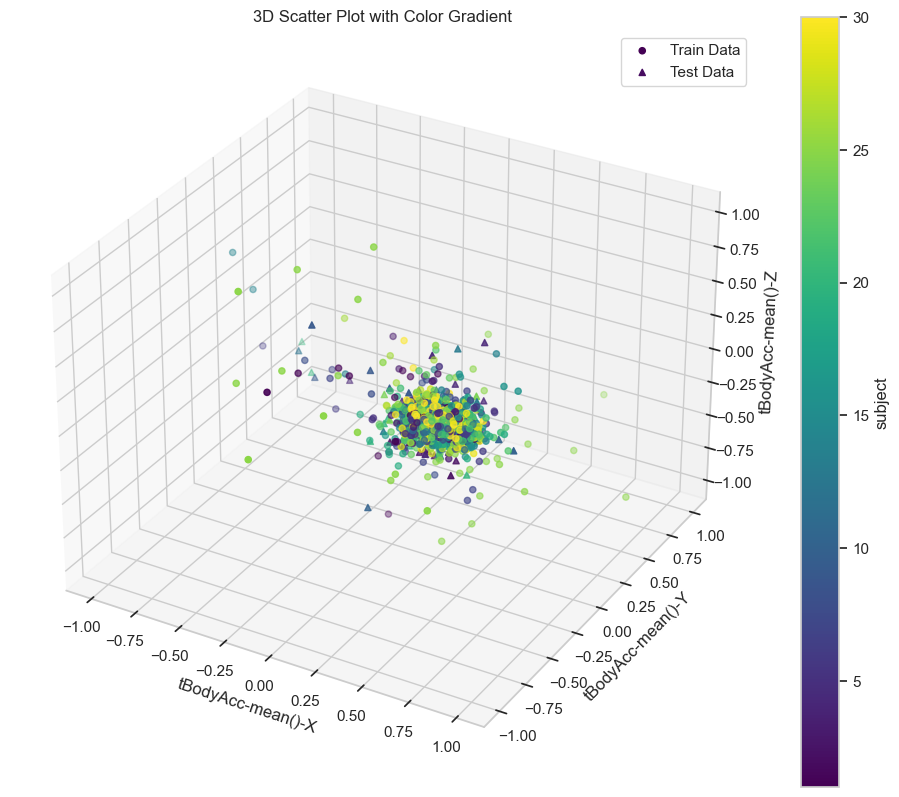

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

feature1 = 'tBodyAcc-mean()-X'
feature2 = 'tBodyAcc-mean()-Y'
feature3 = 'tBodyAcc-mean()-Z'

color_feature = 'subject'  

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

x_train = df_train[feature1]
y_train = df_train[feature2]
z_train = df_train[feature3]
color_train = df_train[color_feature]  

x_test = df_test[feature1]
y_test = df_test[feature2]
z_test = df_test[feature3]
color_test = df_test[color_feature]  

cmap = plt.cm.viridis 

norm = plt.Normalize(color_train.min(), color_train.max())

sc = ax.scatter(x_train, y_train, z_train, c=color_train, cmap=cmap, norm=norm, marker='o', label='Train Data')
sc = ax.scatter(x_test, y_test, z_test, c=color_test, cmap=cmap, norm=norm, marker='^', label='Test Data')

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)

plt.title('3D Scatter Plot with Color Gradient')

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label(color_feature)

plt.legend()

plt.show()


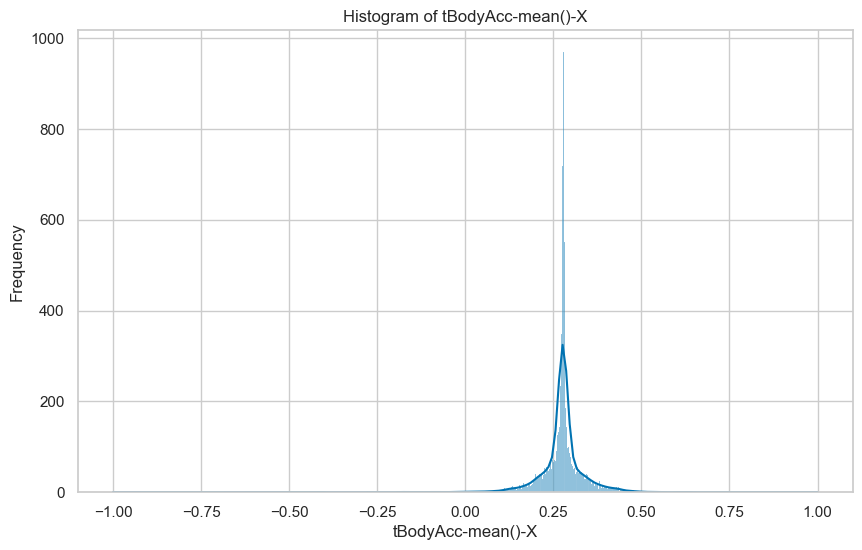

In [64]:
sns.set_theme(style="whitegrid", palette="colorblind")

plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='tBodyAcc-mean()-X', kde=True)
plt.title('Histogram of tBodyAcc-mean()-X')
plt.xlabel('tBodyAcc-mean()-X')
plt.ylabel('Frequency')
plt.show()


C:\Users\nyoja\AppData\Local\Temp\ipykernel_10252\260699688.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_train, x='Activity', palette="Set3")


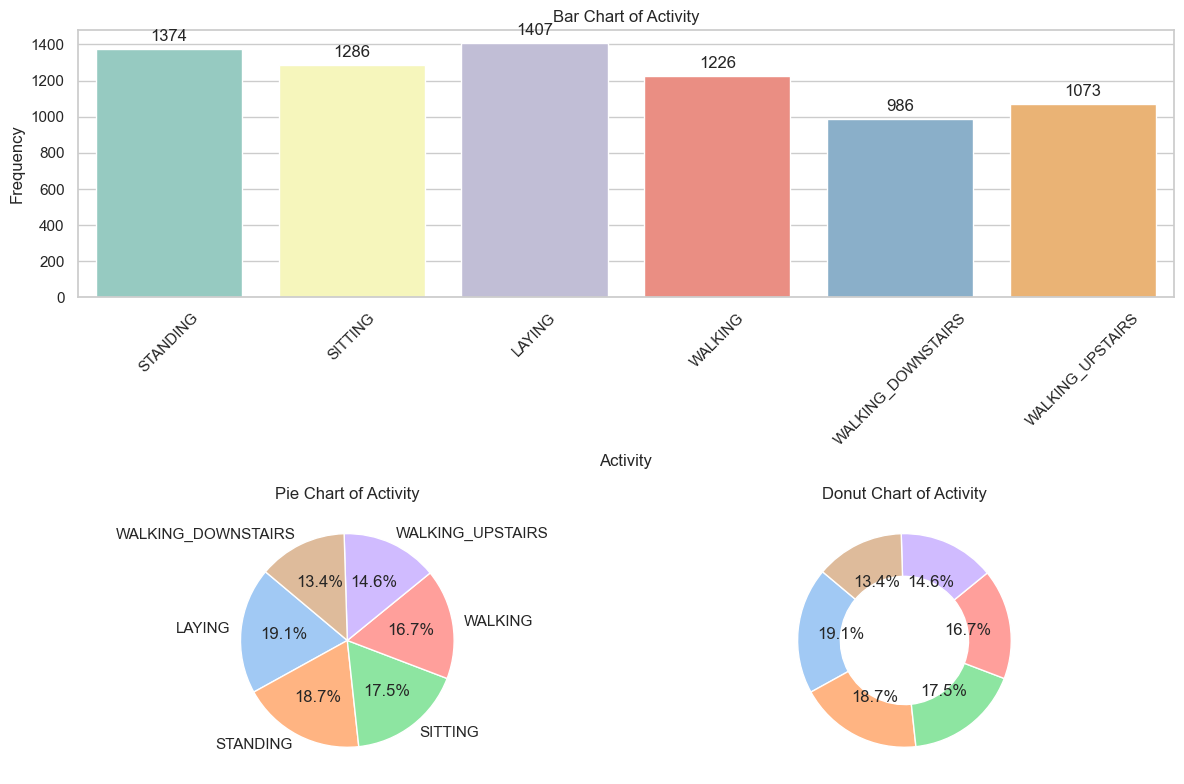

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
ax = sns.countplot(data=df_train, x='Activity', palette="Set3")
plt.title('Bar Chart of Activity')
plt.xlabel('Activity')
plt.ylabel('Frequency')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
activity_counts = df_train['Activity'].value_counts()
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Activity')

plt.subplot(2, 2, 4)
plt.pie(activity_counts, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Donut Chart of Activity')

plt.tight_layout()
plt.show()


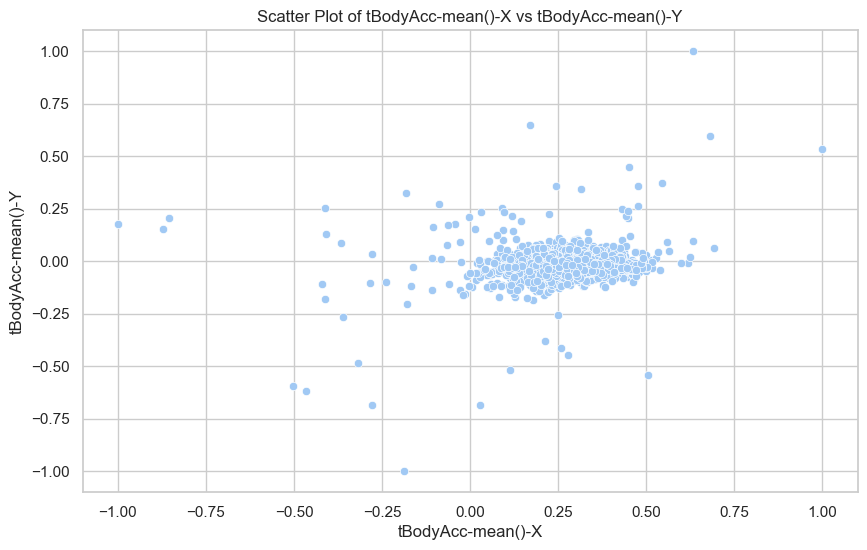

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='tBodyAcc-mean()-X', y='tBodyAcc-mean()-Y')
plt.title('Scatter Plot of tBodyAcc-mean()-X vs tBodyAcc-mean()-Y')
plt.xlabel('tBodyAcc-mean()-X')
plt.ylabel('tBodyAcc-mean()-Y')
plt.show()


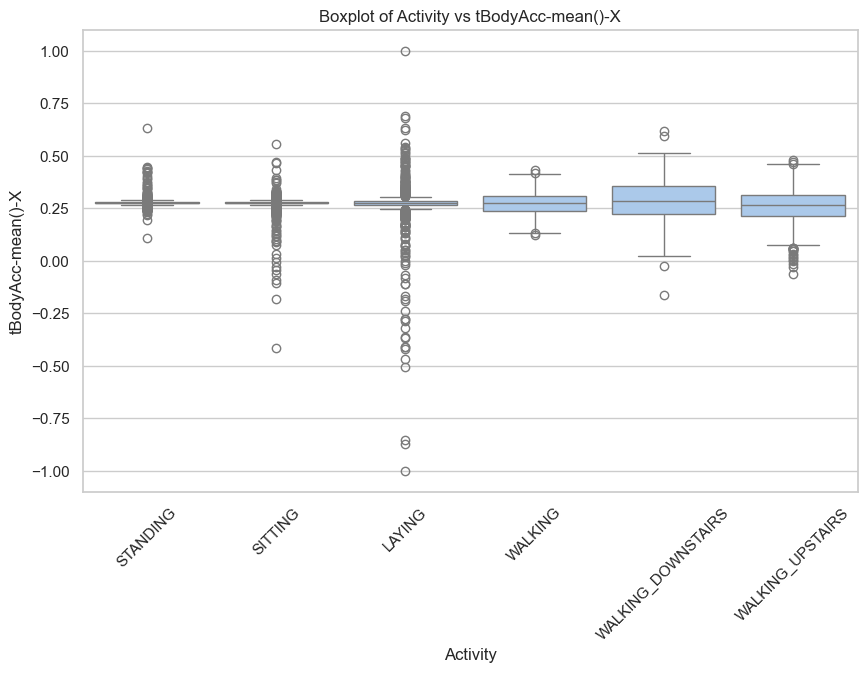

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='Activity', y='tBodyAcc-mean()-X')
plt.title('Boxplot of Activity vs tBodyAcc-mean()-X')
plt.xlabel('Activity')
plt.ylabel('tBodyAcc-mean()-X')
plt.xticks(rotation=45)
plt.show()


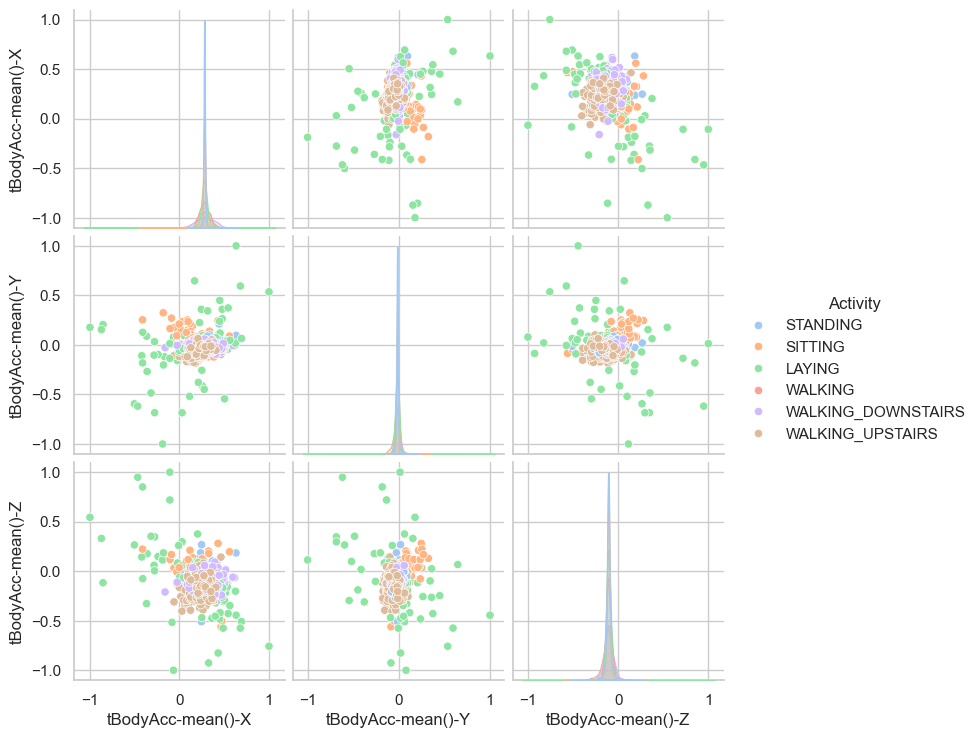

In [68]:
selected_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'Activity']
sns.pairplot(df_train[selected_features], hue='Activity')
plt.show()


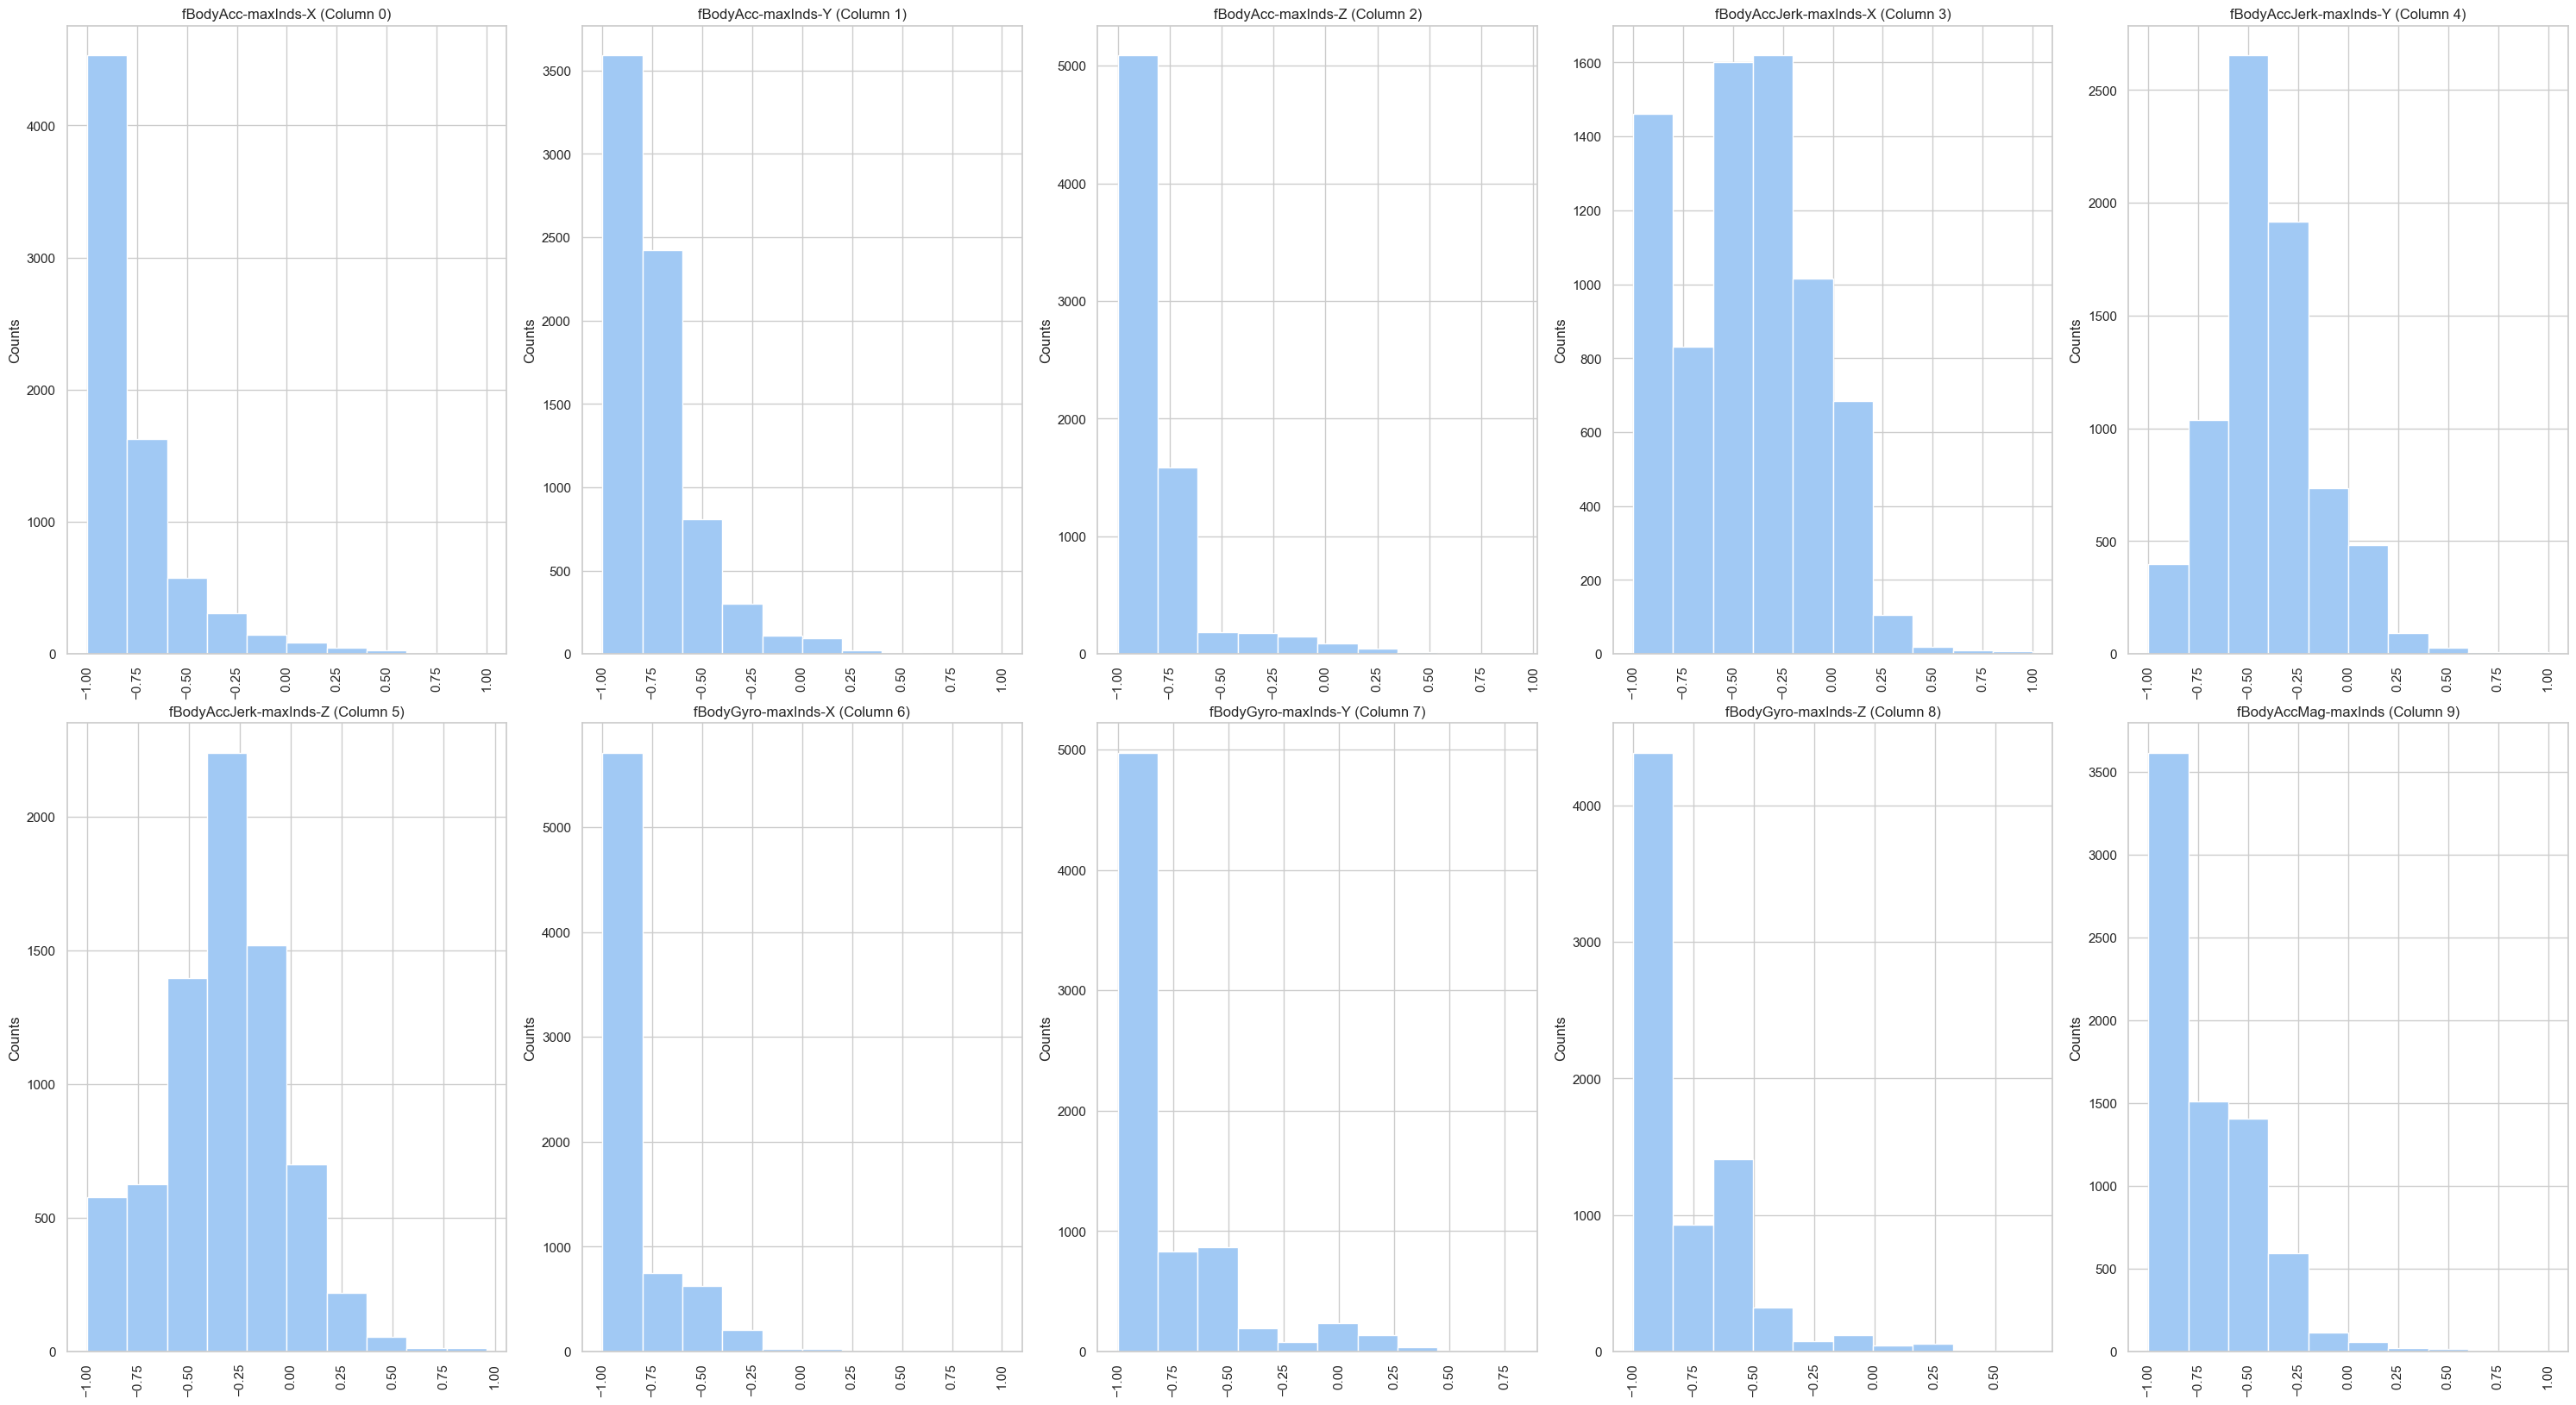

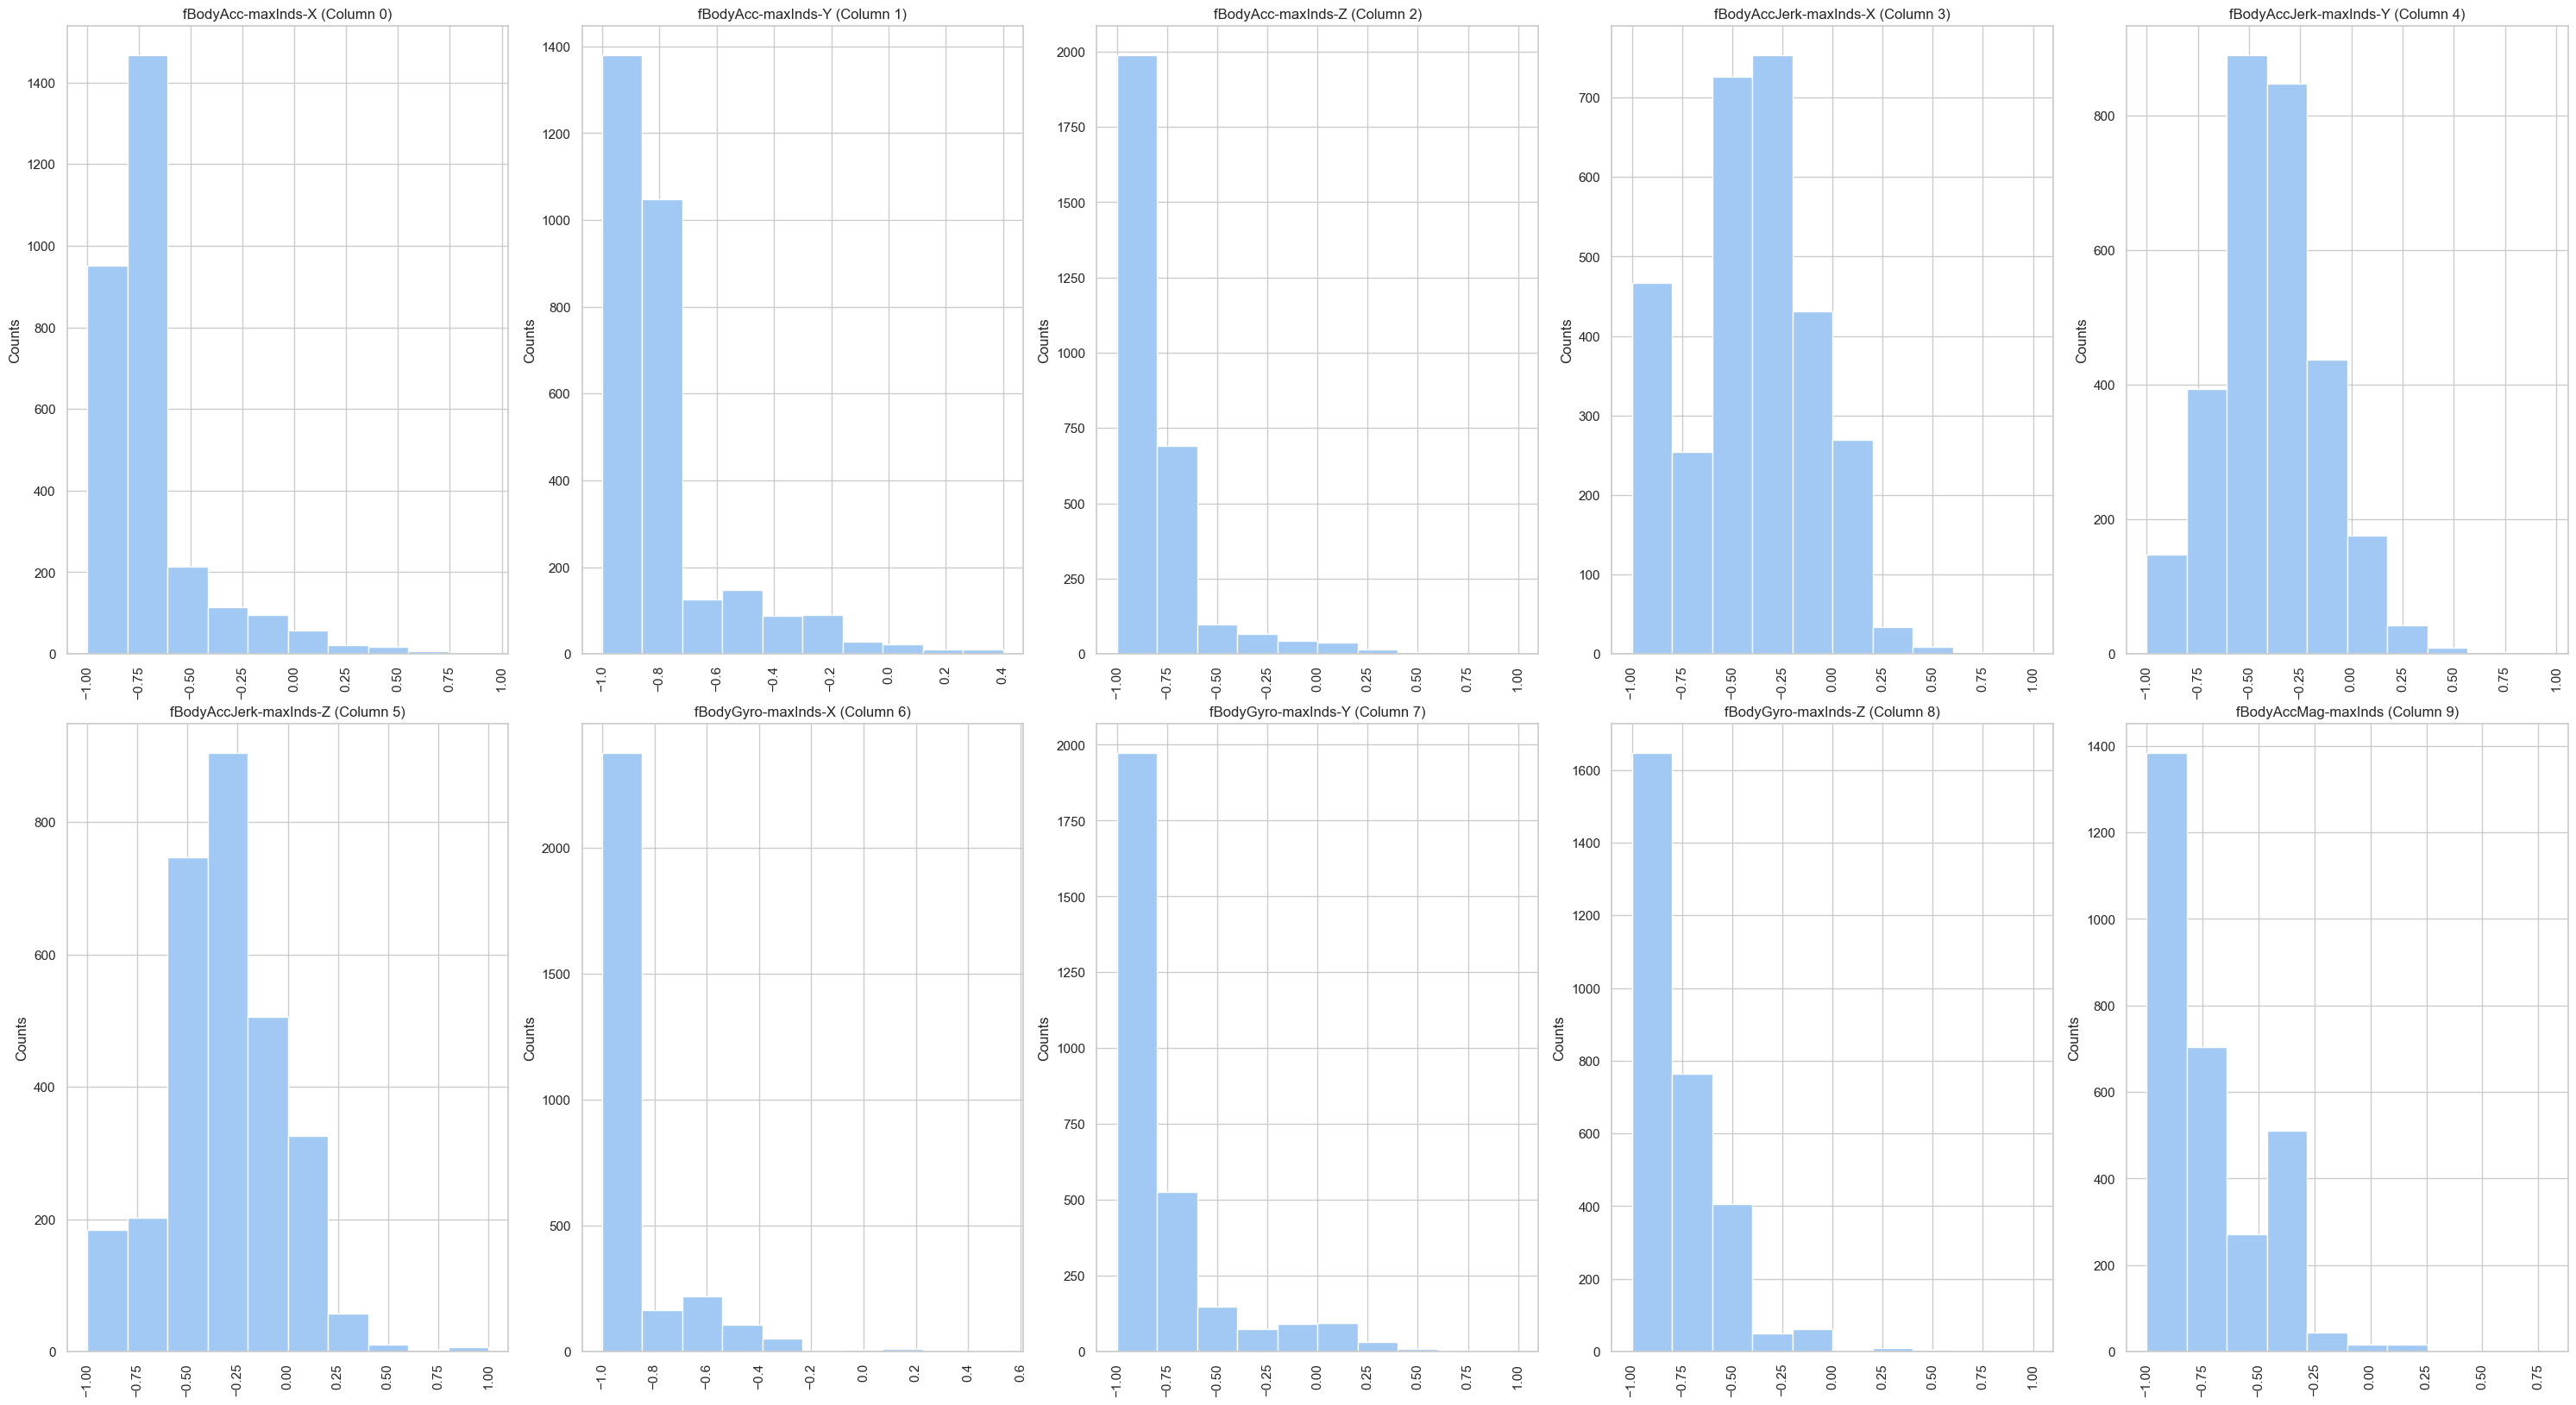

In [69]:
def plotPerColumnDistribution(df, nGraphShown=10, nGraphPerRow=5):
    nunique = df.nunique()
    df = df[[col for col in df if 1 < nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow))
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnData = df.iloc[:, i]
        if not np.issubdtype(type(columnData.iloc[0]), np.number):
            valueCounts = columnData.value_counts()
            valueCounts.plot.bar()
        else:
            columnData.hist()
        plt.ylabel('Counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (Column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

plotPerColumnDistribution(df_train, 10, 5)
plotPerColumnDistribution(df_test, 10, 5)


In [70]:
df_train_numeric = df_train.apply(pd.to_numeric, errors='coerce')
df_train_numeric.dropna(inplace=True)


In [71]:
assign = {
    'WALKING': 0,
    'STANDING': 1,
    'LAYING': 2,
    'WALKING_UPSTAIRS': 3,
    'SITTING': 4,
    'WALKING_DOWNSTAIRS': 5
}

df_train['Activity_num'] = df_train['Activity'].map(assign)
df_test['Activity_num'] = df_test['Activity'].map(assign)

df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

df_train.drop(columns=['Activity'], inplace=True)
df_test.drop(columns=['Activity'], inplace=True)

correlation_matrix = df_train.corr()
activity_corr = correlation_matrix['Activity_num'].drop(labels=['Activity_num'])
sorted_activity_corr = activity_corr.sort_values(ascending=False).round(2)

unique_corr = {}
unique_values = set()
for col, corr_value in sorted_activity_corr.items():
    if abs(corr_value) not in unique_values:
        unique_values.add(abs(corr_value))
        unique_corr[col] = corr_value

selected_features = list(unique_corr.keys())

X_train = df_train[selected_features].values
y_train = df_train['Activity_num'].values
X_test = df_test[selected_features].values
y_test = df_test['Activity_num'].values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training Accuracy: 0.7993743199129488
Testing Accuracy: 0.8089582626399728

Training Precision: 0.8008737381928136
Testing Precision: 0.8130661316254404

Training Recall: 0.7993743199129488
Testing Recall: 0.8089582626399728

Training F1 Score: 0.799368124359651
Testing F1 Score: 0.8075958701641136


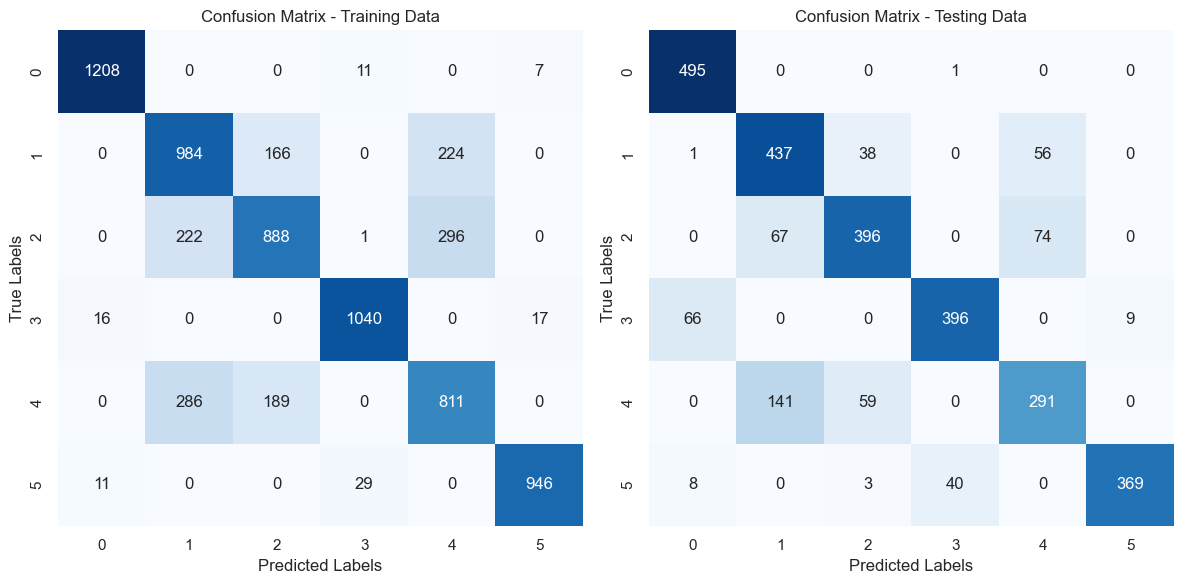


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1226
           1       0.66      0.72      0.69      1374
           2       0.71      0.63      0.67      1407
           3       0.96      0.97      0.97      1073
           4       0.61      0.63      0.62      1286
           5       0.98      0.96      0.97       986

    accuracy                           0.80      7352
   macro avg       0.82      0.82      0.82      7352
weighted avg       0.80      0.80      0.80      7352


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       496
           1       0.68      0.82      0.74       532
           2       0.80      0.74      0.77       537
           3       0.91      0.84      0.87       471
           4       0.69      0.59      0.64       491
           5       0.98      0.88      0.92       420

In [72]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_precision = precision_score(y_train, y_pred_train, average='weighted')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    train_recall = recall_score(y_train, y_pred_train, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    class_report_train = classification_report(y_train, y_pred_train)
    class_report_test = classification_report(y_test, y_pred_test)
    
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print("\nTraining Precision:", train_precision)
    print("Testing Precision:", test_precision)
    print("\nTraining Recall:", train_recall)
    print("Testing Recall:", test_recall)
    print("\nTraining F1 Score:", train_f1)
    print("Testing F1 Score:", test_f1)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix - Training Data')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    
    plt.subplot(1, 2, 2)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix - Testing Data')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    
    plt.tight_layout()
    plt.show()
    
    print("\nClassification Report - Training Data:")
    print(class_report_train)
    print("\nClassification Report - Testing Data:")
    print(class_report_test)

logreg = LogisticRegression(max_iter=1000)
train_and_evaluate_model(logreg, X_train_scaled, y_train, X_test_scaled, y_test)


Training Accuracy: 1.0
Testing Accuracy: 0.8506956226671191

Training Precision: 1.0
Testing Precision: 0.8542621307215009

Training Recall: 1.0
Testing Recall: 0.8506956226671191

Training F1 Score: 1.0
Testing F1 Score: 0.8499727825894342


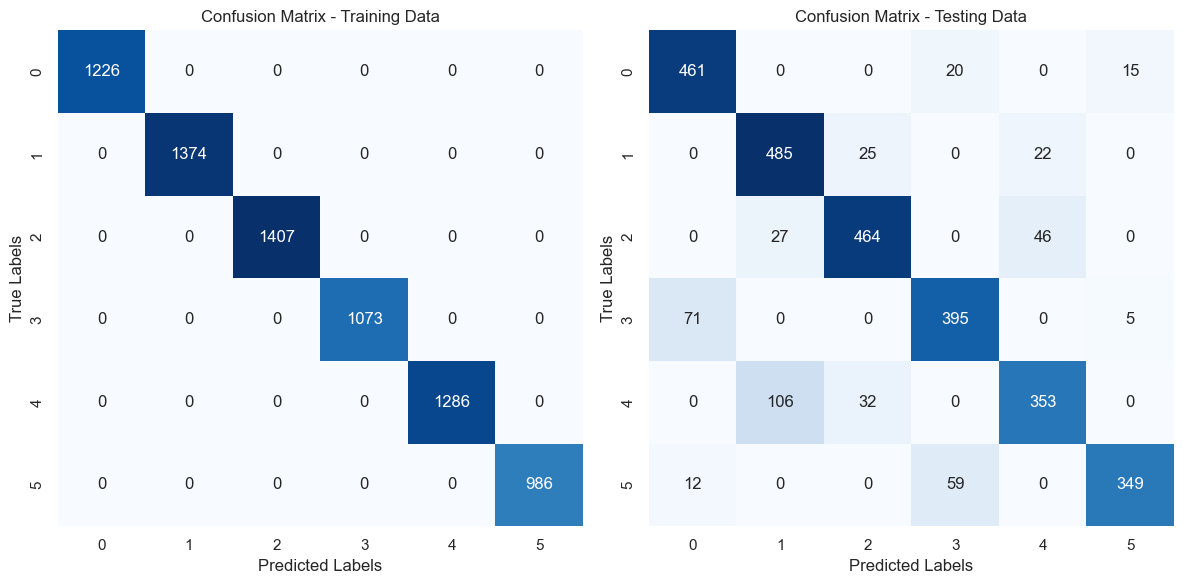


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1226
           1       1.00      1.00      1.00      1374
           2       1.00      1.00      1.00      1407
           3       1.00      1.00      1.00      1073
           4       1.00      1.00      1.00      1286
           5       1.00      1.00      1.00       986

    accuracy                           1.00      7352
   macro avg       1.00      1.00      1.00      7352
weighted avg       1.00      1.00      1.00      7352


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       496
           1       0.78      0.91      0.84       532
           2       0.89      0.86      0.88       537
           3       0.83      0.84      0.84       471
           4       0.84      0.72      0.77       491
           5       0.95      0.83      0.88       420

In [73]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(rf_classifier, X_train_scaled, y_train, X_test_scaled, y_test)


Training Accuracy: 0.8426278563656148
Testing Accuracy: 0.7020699015948422

Training Precision: 0.8463640883786142
Testing Precision: 0.7096885854819219

Training Recall: 0.8426278563656148
Testing Recall: 0.7020699015948422

Training F1 Score: 0.8412883632443484
Testing F1 Score: 0.697604881865004


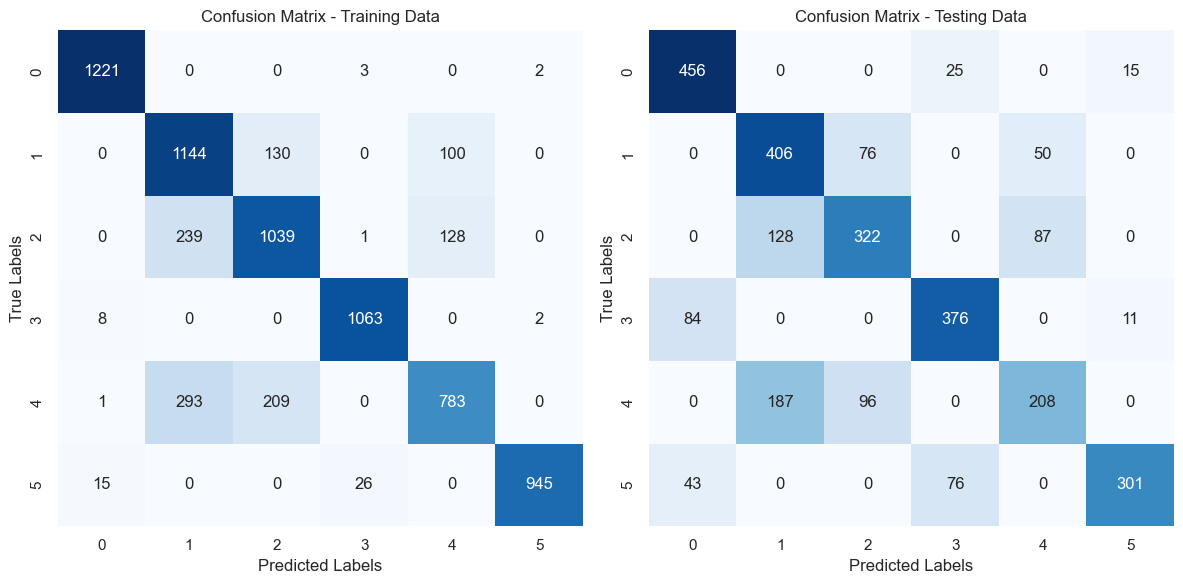


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1226
           1       0.68      0.83      0.75      1374
           2       0.75      0.74      0.75      1407
           3       0.97      0.99      0.98      1073
           4       0.77      0.61      0.68      1286
           5       1.00      0.96      0.98       986

    accuracy                           0.84      7352
   macro avg       0.86      0.85      0.85      7352
weighted avg       0.85      0.84      0.84      7352


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       496
           1       0.56      0.76      0.65       532
           2       0.65      0.60      0.62       537
           3       0.79      0.80      0.79       471
           4       0.60      0.42      0.50       491
           5       0.92      0.72      0.81       420

In [74]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn_classifier, X_train_scaled, y_train, X_test_scaled, y_test)


Training Accuracy: 1.0
Testing Accuracy: 0.7472005429250085

Training Precision: 1.0
Testing Precision: 0.7503243493707599

Training Recall: 1.0
Testing Recall: 0.7472005429250085

Training F1 Score: 1.0
Testing F1 Score: 0.7476890271553401


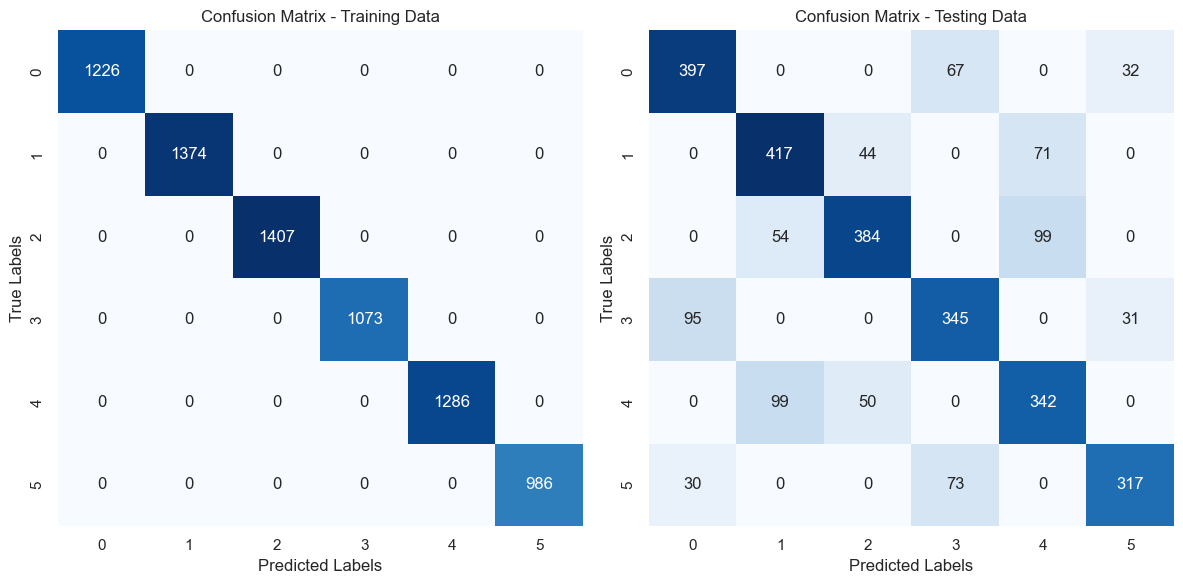


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1226
           1       1.00      1.00      1.00      1374
           2       1.00      1.00      1.00      1407
           3       1.00      1.00      1.00      1073
           4       1.00      1.00      1.00      1286
           5       1.00      1.00      1.00       986

    accuracy                           1.00      7352
   macro avg       1.00      1.00      1.00      7352
weighted avg       1.00      1.00      1.00      7352


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       496
           1       0.73      0.78      0.76       532
           2       0.80      0.72      0.76       537
           3       0.71      0.73      0.72       471
           4       0.67      0.70      0.68       491
           5       0.83      0.75      0.79       420

In [75]:
dt_classifier = DecisionTreeClassifier(random_state=42)
train_and_evaluate_model(dt_classifier, X_train_scaled, y_train, X_test_scaled, y_test)


Training Accuracy: 1.0
Testing Accuracy: 0.8751272480488632

Training Precision: 1.0
Testing Precision: 0.8766048608312212

Training Recall: 1.0
Testing Recall: 0.8751272480488632

Training F1 Score: 1.0
Testing F1 Score: 0.8748949024162009


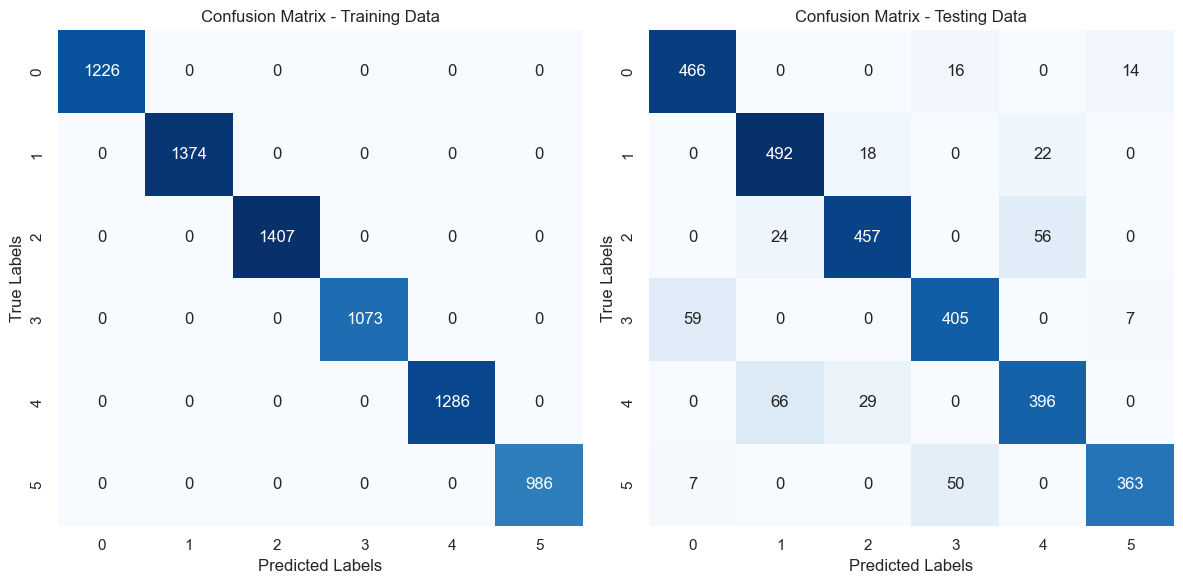


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1226
           1       1.00      1.00      1.00      1374
           2       1.00      1.00      1.00      1407
           3       1.00      1.00      1.00      1073
           4       1.00      1.00      1.00      1286
           5       1.00      1.00      1.00       986

    accuracy                           1.00      7352
   macro avg       1.00      1.00      1.00      7352
weighted avg       1.00      1.00      1.00      7352


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       496
           1       0.85      0.92      0.88       532
           2       0.91      0.85      0.88       537
           3       0.86      0.86      0.86       471
           4       0.84      0.81      0.82       491
           5       0.95      0.86      0.90       420

In [76]:
xgb_classifier = XGBClassifier(random_state=42)
train_and_evaluate_model(xgb_classifier, X_train_scaled, y_train, X_test_scaled, y_test)


Epoch 1/50
92/92 [==============================] - 1s 5ms/step - loss: 1.4727 - accuracy: 0.3676 - val_loss: 0.9845 - val_accuracy: 0.6540
Epoch 2/50
92/92 [==============================] - 0s 5ms/step - loss: 1.0419 - accuracy: 0.5280 - val_loss: 0.8095 - val_accuracy: 0.6859
Epoch 3/50
92/92 [==============================] - 0s 4ms/step - loss: 0.9096 - accuracy: 0.5866 - val_loss: 0.7148 - val_accuracy: 0.7124
Epoch 4/50
92/92 [==============================] - 0s 3ms/step - loss: 0.8352 - accuracy: 0.6138 - val_loss: 0.6618 - val_accuracy: 0.7206
Epoch 5/50
92/92 [==============================] - 0s 3ms/step - loss: 0.7883 - accuracy: 0.6400 - val_loss: 0.6406 - val_accuracy: 0.7206
Epoch 6/50
92/92 [==============================] - 0s 3ms/step - loss: 0.7623 - accuracy: 0.6567 - val_loss: 0.6257 - val_accuracy: 0.7369
Epoch 7/50
92/92 [==============================] - 0s 3ms/step - loss: 0.7384 - accuracy: 0.6672 - val_loss: 0.6031 - val_accuracy: 0.7315
Epoch 8/50
92/92 [==

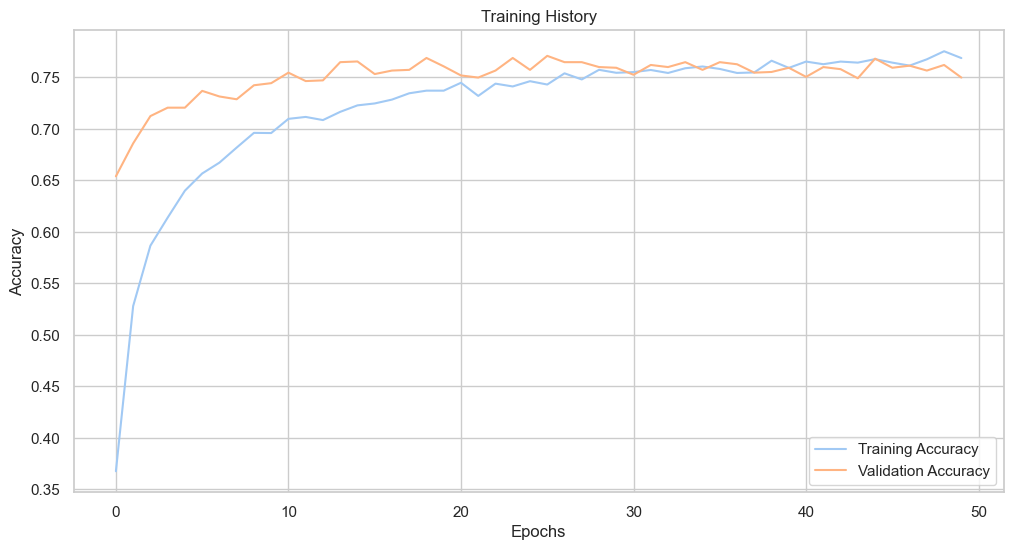

93/93 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7581
Test Loss: 0.583017885684967
Test Accuracy: 0.758059024810791


In [77]:
# Deep Learning Model using Sequential API
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2)

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [78]:
model.save("human_activity_recognition_model.h5")

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)


In [79]:
print("Shape of X_test:", X_test.shape)
print("Shape of training data:", X_train.shape)

Shape of X_test: (2947, 38)
Shape of training data: (7352, 38)


In [80]:
from tensorflow.keras.models import load_model
import pickle

loaded_model = load_model("human_activity_recognition_model.h5")

with open("scaler.pkl", "rb") as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

inverse_assign = {
    0: 'Walking',
    1: 'Walking upstairs',
    2: 'Walking downstairs',
    3: 'Sitting',
    4: 'Standing',
    5: 'Laying'
}

X_test_features = df_test.drop(columns=['Activity_num']).values 
X_test_features = X_test_features[:, :X_train.shape[1]] 
predictions = loaded_model.predict(X_test_features)
predicted_labels = [np.argmax(prediction) for prediction in predictions]
decoded_labels = [inverse_assign[label] for label in predicted_labels]
print(decoded_labels)


93/93 [==============================] - 0s 1ms/step
['Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 'Walking upstairs', 'Standing', 'Walking downstairs', 'Walking downstairs', 'Standing', 'Walking downstairs', 'Walking downstairs', 'Walking downstairs', 

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)
best_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_classifier.fit(X_train_scaled, y_train)

accuracy = best_rf_classifier.score(X_test_scaled, y_test)
print("Accuracy with best hyperparameters:", accuracy)


Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy with best hyperparameters: 0.8520529351883271


In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
def create_nn_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(len(assign), activation='softmax')
    ])
    return model
nn_model = create_nn_model()

nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
history = nn_model.fit(X_train_scaled, y_train,
                       epochs=20,
                       batch_size=64,
                       validation_split=0.2)


Epoch 1/20
92/92 [==============================] - 1s 6ms/step - loss: 1.2669 - accuracy: 0.4482 - val_loss: 0.8238 - val_accuracy: 0.6948
Epoch 2/20
92/92 [==============================] - 0s 5ms/step - loss: 0.8950 - accuracy: 0.6009 - val_loss: 0.7024 - val_accuracy: 0.6954
Epoch 3/20
92/92 [==============================] - 0s 4ms/step - loss: 0.7911 - accuracy: 0.6434 - val_loss: 0.6256 - val_accuracy: 0.7301
Epoch 4/20
92/92 [==============================] - 0s 3ms/step - loss: 0.7403 - accuracy: 0.6734 - val_loss: 0.5892 - val_accuracy: 0.7342
Epoch 5/20
92/92 [==============================] - 0s 4ms/step - loss: 0.7092 - accuracy: 0.6837 - val_loss: 0.5815 - val_accuracy: 0.7390
Epoch 6/20
92/92 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.6951 - val_loss: 0.5670 - val_accuracy: 0.7356
Epoch 7/20
92/92 [==============================] - 0s 4ms/step - loss: 0.6609 - accuracy: 0.7089 - val_loss: 0.5630 - val_accuracy: 0.7383
Epoch 8/20
92/92 [==

In [83]:
test_loss, test_accuracy = nn_model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


93/93 [==============================] - 0s 1ms/step - loss: 0.5784 - accuracy: 0.7570
Test Loss: 0.5784149765968323
Test Accuracy: 0.7570410370826721
